In [86]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
device = 'cpu'

In [87]:
n = 4 # n = 100 had probs
p = 5

# data
X = np.random.randn(n, p)
# X_test = np.random.randn(n, p)

Y = 2 * X[:, 0] + 3 * X[:, 1] # + 0.5 * np.random.randn(n)
# Y_test = 2 * X_test[:, 0] + 3 * X_test[:, 1] # + 0.5 * np.random.randn(n)

X = torch.Tensor(X).to(device)
Y = torch.Tensor(Y).reshape(-1, 1).to(device)
print(X.shape, Y.shape)

torch.Size([4, 5]) torch.Size([4, 1])


In [88]:
# plt.plot(X[:, 0], Y, 'o')
# plt.show()

In [ ]:
# Hyper-parameters 
input_size = X.shape[1]
num_epochs = int(1e5)
lr = 1e-2
# lr = 1e-4
lambda_ridge = 0 #1e3

# linear model
model = nn.Linear(input_size, 1).to(device)
model.weight.data = 0 * model.weight.data

# Loss and optimizer
criterion = nn.MSELoss() # nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=lr)  
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)  

# Train the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, Y) #+ lambda_ridge * model.weight.norm()

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

    if epoch % 1000 == 0:
        print (f'Epoch: {epoch}, Loss: {loss.item():.4f}, \
                norm: {model.weight.norm()}')    

In [47]:
w = model.weight.detach().numpy()[0]
wnorm = np.linalg.norm(w)
wunit = w / wnorm
print(wunit, w)

[1.000] [0.000]


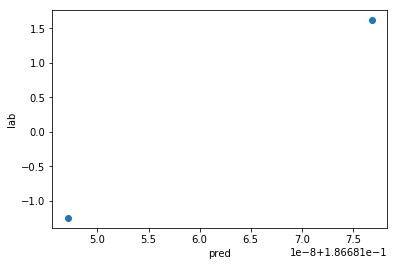

In [48]:
plt.plot(outputs.detach().numpy(), Y.detach().numpy(), 'o')
plt.xlabel('pred')
plt.ylabel('lab')
plt.show()